<a href="https://colab.research.google.com/github/dhananjai14/ML-Concepts/blob/main/Bias_vaiance_tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias Variance Trade-off 

Have you ever visualised how any model is **overfits** or **underfits** the dataset? Or are you confused to understand what is under fitting or overfitting? Or how the over fitting data is very complex and under fitting data is very simple? 

This article will give you answer to above questions and it will clear your doubt on overfitting and underfitting. 

# 1. Creating the dataset 
Lets start with a simple data set, that has two column x (independent) and y (dependent). Y point is produced with quardratic expression with some random noise.

Lets paint this in code 

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [81]:
m = 50
# generating 500 random data instances 
x = 8 * np.random.rand(m,1) - 3 
y =   x**2 + x + 2 * np.random.rand(m,1)

Now visualizing the x and y dataset.

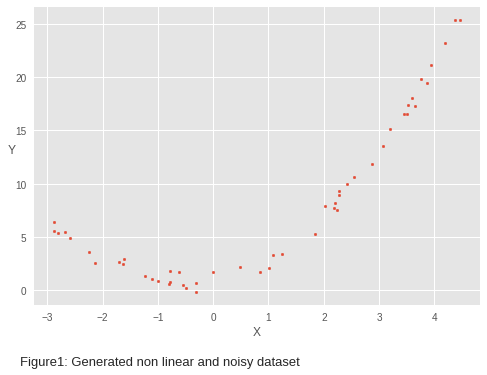

In [82]:
plt.scatter(x, y, s = 6 );
plt.xlabel('X')
plt.ylabel('Y', rotation =0)
plt.text(-3.5, -7 ,'Figure1: Generated non linear and noisy dataset', wrap = True,fontsize = 13);

# 2. Introduction: Overfit and underfit
Before moving further lets try to understand what is **Overfitting and under fitting?**

1. **Underfitting:** If model makes very rough assumption about the dataset, it is called under fitting.     
2. **Overfitting:** If model has made serious efforts to fit the dataset, it is callled overfitting. 

Still Confused with jargans! wait till the end.


# 3. Lets visualize underfitting
On looking carefully at figure 1, it can be concluded that a straight line cannot fit the dataset. Now if a  linear model id build on the dataset, then it will not fit on the dataset, and the model an be called  as *underfit* model. What does the term "not fit the dataset" mean? To understand it, first look at the dataset, it was generated from the quardratic equation but the model developed is linear. So whatever efforts can be made but the prediction by the model will always give huge error.

Lets see this on graph

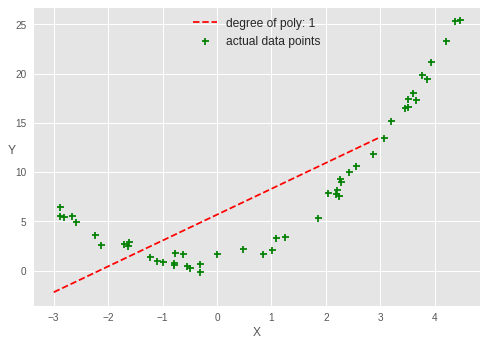

In [83]:
power = 1 # since linear regression
poly = PolynomialFeatures(degree = power, include_bias = False)
model_lr = LinearRegression()

x_poly = poly.fit_transform(x)
model_lr.fit(x_poly,y)

x_new=np.linspace(-3, 3, 400).reshape(400, 1)
x_new_poly = poly.transform(x_new)
y_new = model_lr.predict(x_new_poly)
plt.plot(x_new, y_new, 'r--', label = f'degree of poly: {power}')

plt.scatter(x, y , c = 'g', marker = '+', label = 'actual data points')
plt.xlabel('X')
# plt.axis([-3, 3, -1, 10])
plt.ylabel('Y', rotation = 0)
plt.legend( loc="upper center", fontsize=12);


One thing to note here is that dataset was developed from quardratic equation and the model predicted a straight line. So from the original model the complexity is reduced. On other words one can say *underfitted* model are **less complex** as compared to original model. 

OK now we have understanding of what is underfitting model and how can it be visualized. But in practical situation, it is difficult to make such visualization (Why? Since the dataset might be very complex), then how to understand our model is overfitting or not. To deal with this situation we have following measures:

1. **Cross Validation:** For this purpose one can use cross validation (CV). If model score is worse in training and test dataset then clearly it is the case of *underfitting.* 
2. **Learning Curves:** They are the model performance curve on training and Cross Validation curve. 

Lets visualize both.


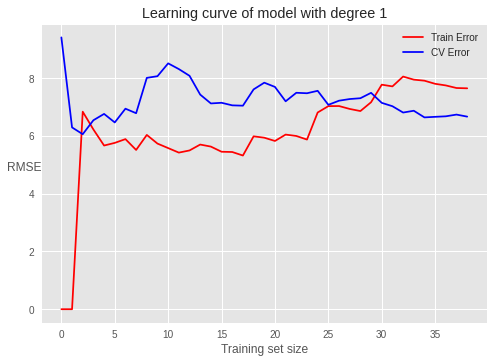

In [84]:
model_lr = LinearRegression()
def learning_curves(model, x , y):
    x_train, x_CV, y_train, y_CV = train_test_split(x, y , test_size= .2, random_state= 44)
    train_err , CV_err = [] , []
    for m in range(1, len(x_train)):
        model.fit(x[:m], y_train[:m])
        y_train_pred = model.predict(x[:m]) 
        y_CV_pred = model.predict(x_CV)

        train_err.append(np.sqrt(mean_squared_error(y_train[:m], y_train_pred)))
        CV_err.append(np.sqrt(mean_squared_error(y_CV, y_CV_pred)))
    
    plt.plot(train_err, 'r', label = 'Train Error')
    plt.plot(CV_err, 'b', label = 'CV Error')
    plt.legend(loc="upper right")
    plt.ylabel('RMSE', rotation = 0)
    plt.xlabel('Training set size')
    plt.title(f'Learning curve of model with degree {x.shape[1]}');

learning_curves(model_lr , x, y)
# plt.ylim((0,12))

From the above curve one can find that their is large error on the training and Cross Validating dataset. This means that model is neither perfroming well on training dataset nor on Cross Validating dataset. 
It is very much obvious as we are trying to fit the linear model  onto the quardratic curve. This is the causes high error on training and Cross Validation set. 

**Conclusion:** The under fitted model have high error on training and Cross Validating dataset.



# 4. Lets visualize overfitting

When the model tries to exactly fit the data instance is the situation of **Ovefitting.** Means that model will try to catch every data instance provided. So this sort of model will give less error on training dataset.  

Lets visualise this.


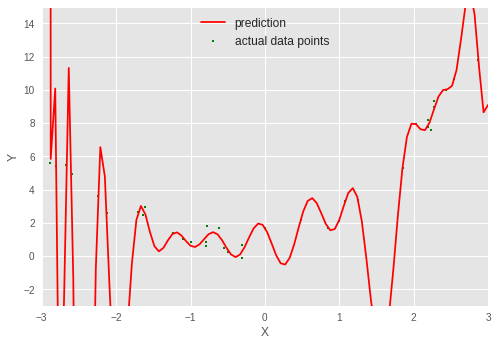

In [85]:
poly = PolynomialFeatures(degree = 100, include_bias = False)
scaler = StandardScaler()
model_lr = LinearRegression()

x_poly = poly.fit_transform(x)
x_poly_tf = scaler.fit_transform(x_poly)
model_lr.fit(x_poly_tf,y)

x_new=np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = poly.transform(x_new)
x_new_poly_tf = scaler.transform(x_new_poly)
y_new = model_lr.predict(x_new_poly_tf)

plt.plot(x_new, y_new, '-r', label = 'prediction')
plt.scatter(x, y , s = 3, c = 'g', marker = '+', label = 'actual data points')
plt.xlabel('X')
plt.axis([-3, 3, -3, 15])
plt.ylabel('Y')
plt.legend( loc="upper center", fontsize=12);


As it is known that the dataset was developed from quardratic equation and the model predicted a higher order equation. So from the original model the complexity is increased. In other words one can say *overfitted* model are **more complex** as compared to original model. 

Now lets understand how the error is behaves for overfitting model. Since, the model is hunting for every data instances, this will result in less error in training dataset and large error on the Cross Validating datatset. This means that model is perfroming better on training dataset while model performance on the Cross Validating dataset is worsen. This the because the model has learn every data instance of the training datatset (Visible in the plot) so there is less error on training set and large error on Cross Validation set. This happens to the error when model is **overfitted**. 

To understand if the model is overfitting, the best way is to check error for training dataset and then check for cross validation dataset

Same can be visualised using learning curves plotted below.



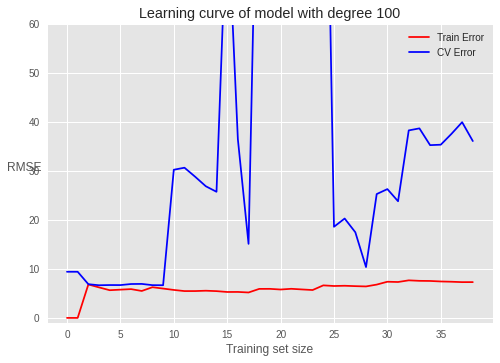

In [86]:
learning_curves(model_lr, x_poly, y)
plt.ylim((-1,60));


**NOTE:**
On comparing the learning curves of underfit and overfit model, following things can be concluded: 
1. **Underfit model:** The error on the training set and cross validation set is high.
2. **Overfit model:** The error on the training set is less and cross validation set is high. 

Lets make an attempt to plot underfit, overfit and actual model into a single graph.

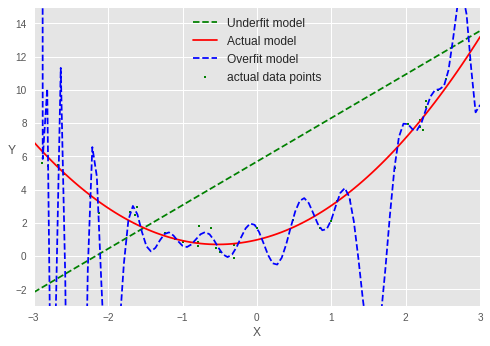

In [89]:
for power, color,model_type in [[1,'g--', 'Underfit model'],[2,'r', 'Actual model'], [100,'b--', 'Overfit model']]:
    poly = PolynomialFeatures(degree = power, include_bias = False)
    scaler = StandardScaler()
    model_lr = LinearRegression()

    x_poly = poly.fit_transform(x)
    x_poly_tf = scaler.fit_transform(x_poly)
    model_lr.fit(x_poly_tf,y)

    x_new=np.linspace(-3, 3, 100).reshape(100, 1)
    x_new_poly = poly.transform(x_new)
    x_new_poly_tf = scaler.transform(x_new_poly)
    y_new = model_lr.predict(x_new_poly_tf)
    plt.plot(x_new, y_new, color, label = model_type)

plt.scatter(x, y , s = 3, c = 'g', marker = '+', label = 'actual data points')
plt.xlabel('X')
plt.axis([-3, 3, -3, 15])
plt.ylabel('Y', rotation = 0)
plt.legend( loc="upper center", fontsize=12);


# 5. Bias Variance Trade-off

An important theoretical result of statistics and machine learning is the fact that a model's generalisation error can be expressed as the sum of three very different errors:

**Bias**

This part of the generalisation error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

**Variance**

This is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.

**Irreducible error**

This is due to the noise of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).


Increasing a model’s complexity will typically increase its variance and reduce its bias.Conversely, reducing a model’s complexity increases its bias and reduces its variance.This is why it is called a tradeoff.

